## <span style="color: #f0f">Задание 1/1</span>

Из папки images загрузите изображение 'operator.png'. Выполните свёртку этого изображения с различными фильтрами, которые позволят сделать следующее:
- Выделить только вертикальные границы

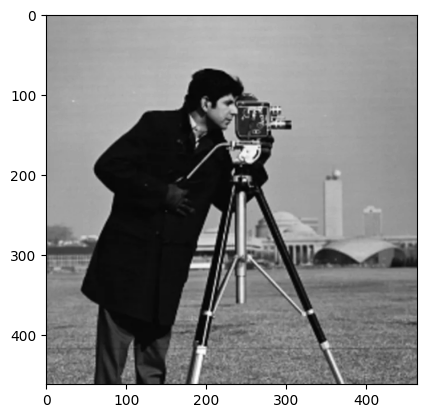

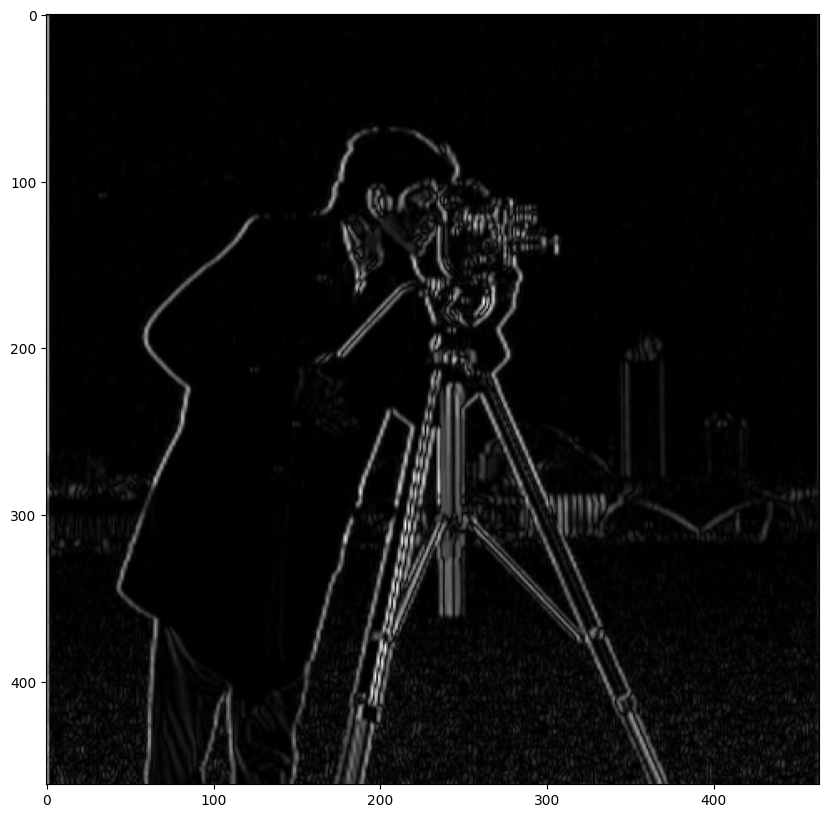

In [17]:
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('images/operator.png')
image_gr = im.convert("L")

arr = np.asarray(image_gr)

%matplotlib inline

imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')

plt.show(imgplot)

kernel = np.array([[ +1, 0, -1],
                   [ +2, 0, -2],
                   [ +1, 0, -1],]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')

- Выделить только горизонтальные границы

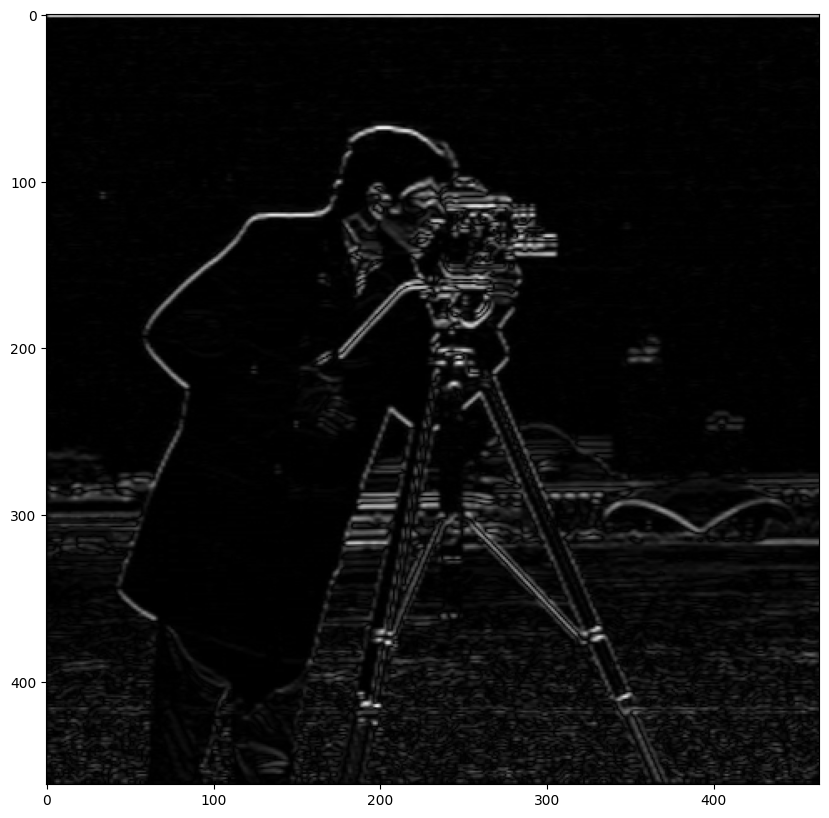

In [18]:
im = Image.open('images/operator.png')
image_gr = im.convert("L")

arr = np.asarray(image_gr)

%matplotlib inline


imgplot.set_cmap('gray')

plt.show(imgplot)

kernel = np.array([[ +1, +2, +1],
                   [  0,  0,  0],
                   [ -1, -2, -1],]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')

- Выделить диагональные границы, идущие из северо-западного угла в юго-восточный.

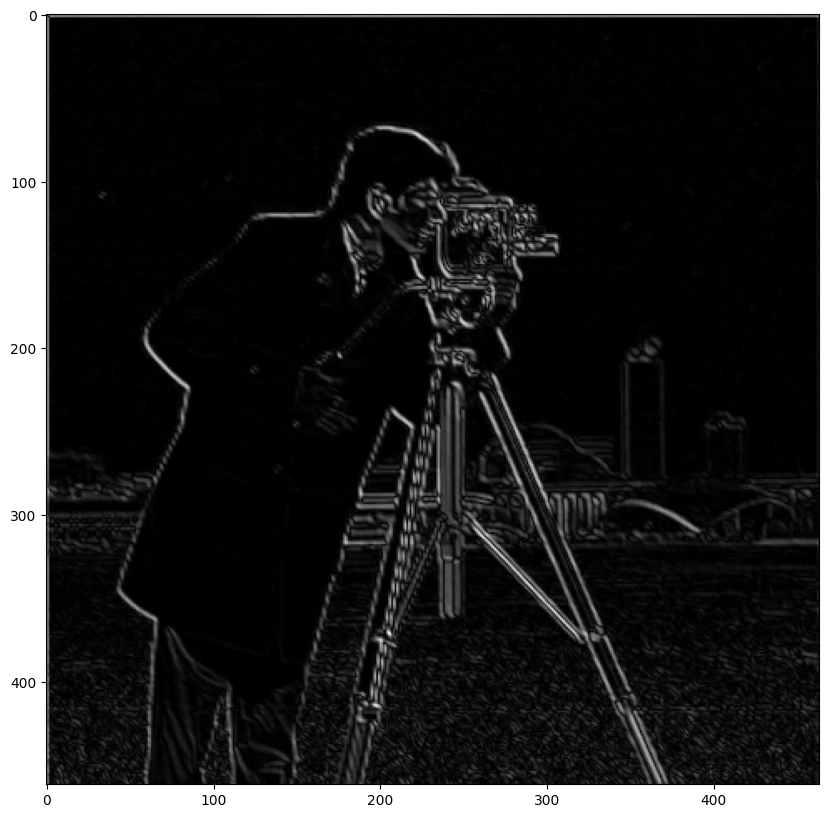

In [19]:
im = Image.open('images/operator.png')
image_gr = im.convert("L")

arr = np.asarray(image_gr)

%matplotlib inline

imgplot.set_cmap('gray')

plt.show(imgplot)

kernel = np.array([[  0, +2,  0],
                   [ -2,  0, +2],
                   [  0, -2,  0],]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')

## <span style="color: #f0f">Задание 1/2</span>

Попробуйте несколько раз подряд выполнить свёртку изображения с фильтром размером 3х3, в котором все коэффициенты равны 1. Визуализируйте промежуточные результаты и объясните их.

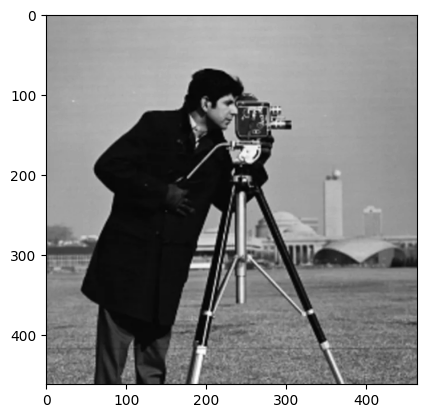

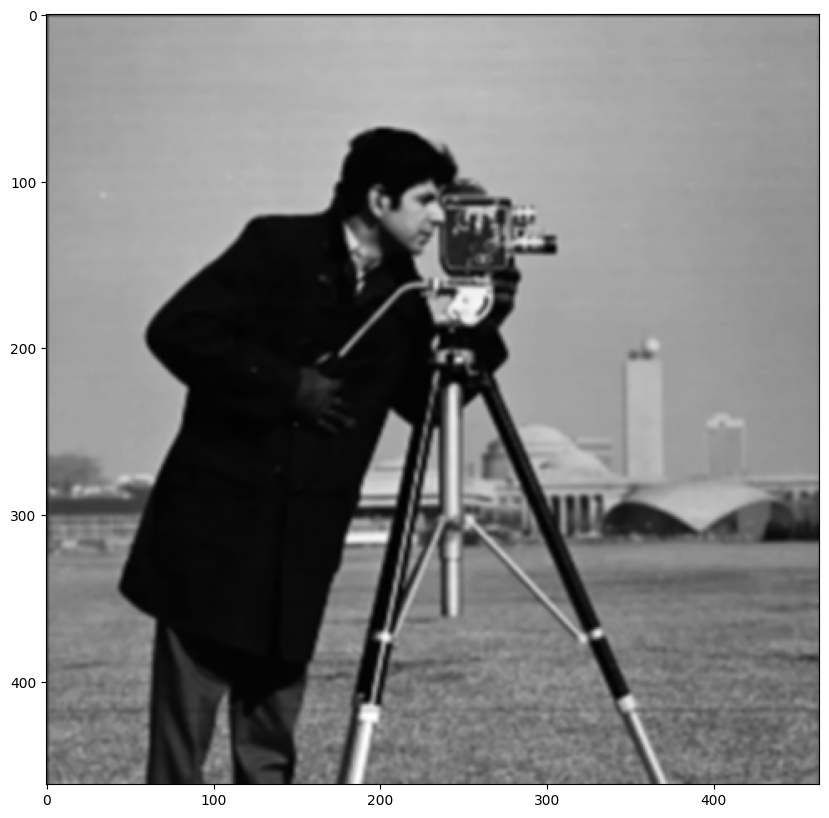

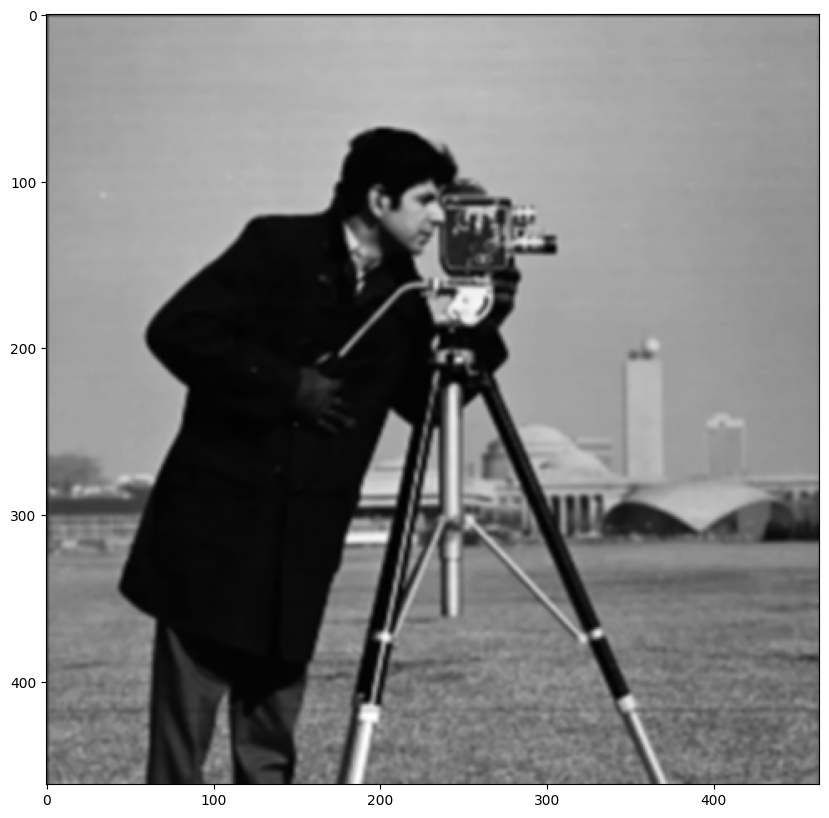

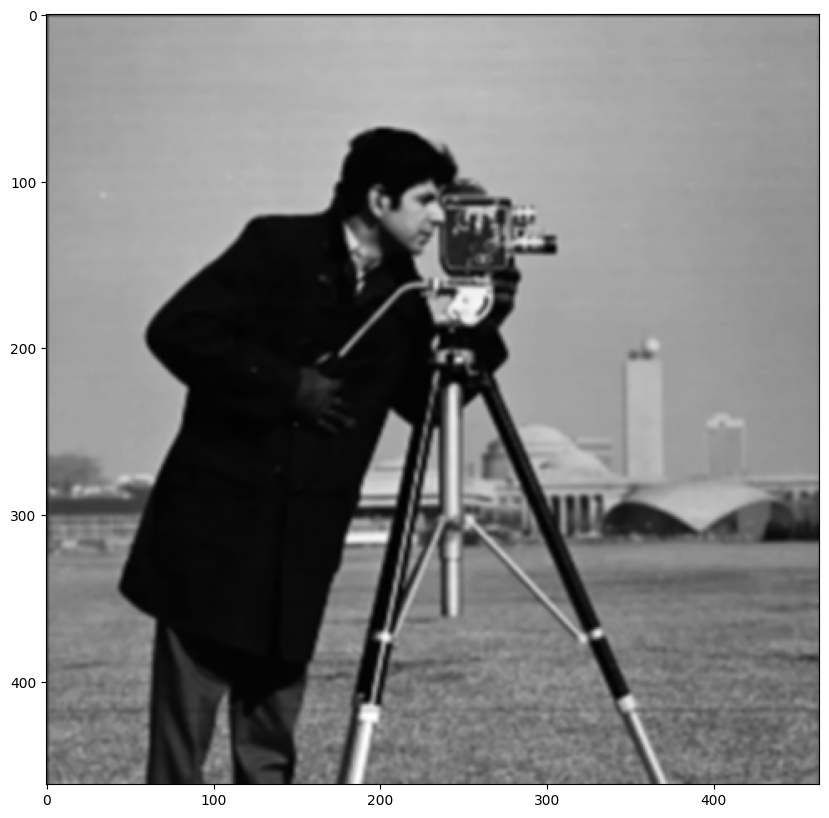

In [20]:
im = Image.open('images/operator.png')
image_gr = im.convert("L")

arr = np.asarray(image_gr)

%matplotlib inline

imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')

plt.show(imgplot)

for i in range (3):
    kernel = np.array([[ 1, 1, 1],
                       [ 1, 1, 1],
                       [ 1, 1, 1],]) 

    grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

    fig, aux = plt.subplots(figsize=(10, 10))
    aux.imshow(np.absolute(grad), cmap='gray')

## Свёрточные нейронные сети

### Пример свёрточной нейронной сети

In [21]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization, Conv2DTranspose #2
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.utils.vis_utils import plot_model

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


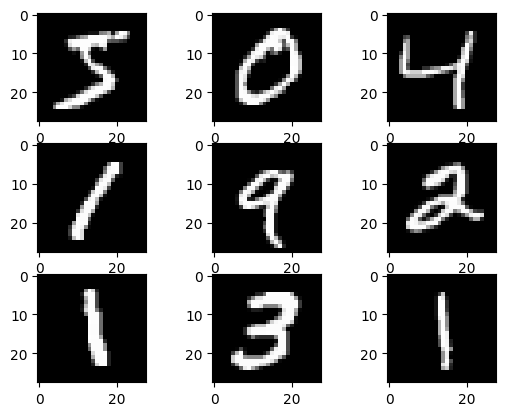

In [22]:
(trainX, trainy), (testX, testy) = mnist.load_data()
# Посмотрим, что там
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# Выведем первые несколько изображений
for i in range(9):
    plt.subplot(330 + 1 + i)
    # Покажем пиксети как есть
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

Основные операции, такие как загрузка данных, масштабирование и построение модели оформим в виде функций.

In [23]:
# Загрузка набора данных
def load_dataset():
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # Меняем форму, чтобы набор был одноканальным
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # применяем унитарное кодирование к размеченным выходам
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [24]:
# Масштабирование
def prep_pixels(train, test):
    # Конвертируем в вещественные значения
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # Приводим яркости к диапазону [0; 1]
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

In [25]:
# Построение модели CNN
def define_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) #2.2 
                                                                                    # значения увеличены в два раза
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) #2.3
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization()) #2.1
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #2.1
    return model

In [26]:
model = define_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 12, 12, 64)       256       
 hNormalization)                                                 
                                                                 
 flatten_6 (Flatten)         (None, 9216)              0         
                                                                 
 dense_12 (Dense)            (None, 100)              

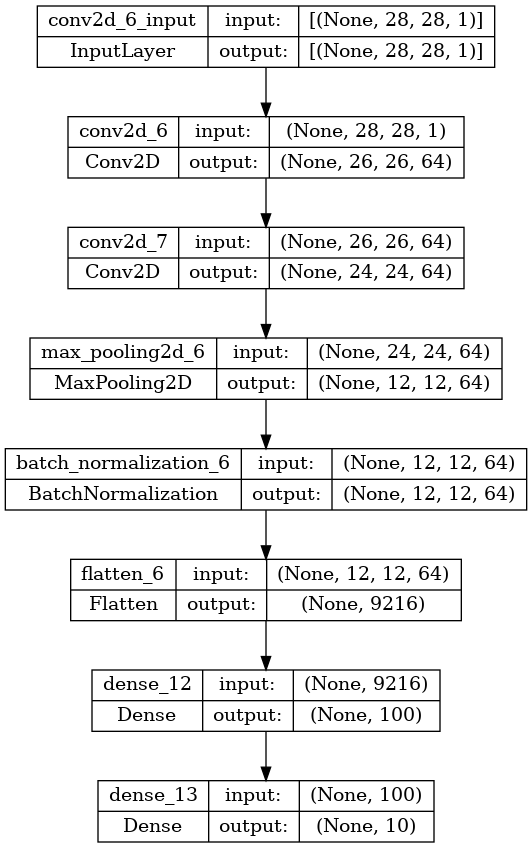

In [27]:
#визуализация модели
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [28]:
# Построим и оценим модель, используя k-fold кросс-валидацию
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # Настраиваем кросс-валидацию
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # Обходим все разбиения
    for train_ix, test_ix in kfold.split(dataX):
        # Строим модель
        model = define_model()
        # Получаем данные для обучающей и проверочной выборки
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # Учим модель - это не очень быстро на старых ПК, но за несколько минут отработает
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # Оцениваем модель
        _, acc = model.evaluate(testX, testY, verbose=1)
        print('> %.3f' % (acc * 100.0))
        # Сохраняем статистику - пригодится для построения графиков
        scores.append(acc)
        histories.append(history)
        
    return scores, histories

In [29]:
# Строим кривые обучения для диагностики
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

In [30]:
# Подбиваем итоги по результатам
def summarize_performance(scores):
    # Выводим статистику
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # Строим графики (коробочный график и "усы")
    plt.boxplot(scores)
    plt.show()

In [31]:
# Запускаем процесс - это главная функция
def run():
    # Грузим данные
    trainX, trainY, testX, testY = load_dataset()
    # Нормализуем изображения для Tensorflow и нейросети
    trainX, testX = prep_pixels(trainX, testX)
    # Строим и оцениваем модель
    scores, histories = evaluate_model(trainX, trainY)
    # Строим кривые обучения
    summarize_diagnostics(histories)
    # Считаем агрегированную статистику
    summarize_performance(scores)
 

# Точка входа - 3... 2... 1... Поехали!
run()

375/375 [==============================] - 22s 57ms/step - loss: 0.0188 - accuracy: 0.9868
> 98.675
375/375 [==============================] - 8s 22ms/step - loss: 0.0150 - accuracy: 0.9874
> 98.742
375/375 [==============================] - 8s 21ms/step - loss: 0.0165 - accuracy: 0.9877
> 98.775


Получен неплохой результат, но его можно улучшить. Вам предлагается задание, в котором это можно сделать самостоятельно.

## <span style="color: #f0f">Задание 2</span>

Считаем построенную модель базовой (baseline). Теперь давайте улучшим её и выжмем столько точности, сколько получится.

1. Усовершенствуйте данную модель, добавив слой батч-нормализации. Оцените изменение результата.
2. Увеличьте размеры карт активации модели в несколько раз. Переобучите модель. Оцените изменение результата. Что можно сказать о такой модели, судя из кривых обучения?
3. Увеличьте глубину модели и переобучите её. Оцените изменение результата.

Найдите модель, которая устойчиво даёт точность классификации более 99% и при этом не является слишком большой.

In [ ]:
def batchnorm_forward(x, gamma, beta, bn_param):
    mode = bn_param['mode']
    eps = bn_param.get('eps', 1e-5)
    momentum = bn_param.get('momentum', 0.9)

    N, D = x.shape
    running_mean = bn_param.get('running_mean', np.zeros(D, dtype=x.dtype))
    running_var = bn_param.get('running_var', np.zeros(D, dtype=x.dtype))

    if mode == 'train':
        sample_mean = x.mean(axis=0)
        sample_var = x.var(axis=0)
        
        running_mean = momentum * running_mean + (1 - momentum) * sample_mean
        running_var = momentum * running_var + (1 - momentum) * sample_var
        
        std = np.sqrt(sample_var + eps)
        x_centered = x - sample_mean
        x_norm = x_centered / std
        out = gamma * x_norm + beta
        
        cache = (x_norm, x_centered, std, gamma)
        
    elif mode == 'test':
        x_norm = (x - running_mean) / np.sqrt(running_var + eps)
        out = out = gamma * x_norm + beta
    
    else:
        raise ValueError('Invalid forward batchnorm mode "%s"' % mode)

    bn_param['running_mean'] = running_mean
    bn_param['running_var'] = running_var

    return out, cache